# CHAPTER 3
**CNN and RNN Using PyTorch**

In [1]:
import torch
from torch.nn import functional
import torch.optim as optim
import matplotlib.pyplot as plt

## Recipe 3-1. Setting Up a Loss Function
In this recipe, we use another tensor as the update variable, and introduce the tensors to the sample model and compute the error or loss. Then we compute the rate of change in the loss function to measure the choice of loss function in model convergence.

In [2]:
dw = 0.01
db = 0.01
learning_rate = 0.001
epoches = 10000

def forward(x, w, b):
    return w * x + b

def train(x, y, w, b, loss_fn):
    for epoch in range(epoches):
        # gradient
        grad_w = (loss_fn(forward(x, w + dw, b), y) - loss_fn(forward(x, w, b), y)) / dw
        grad_b = (loss_fn(forward(x, w, b + db), y) - loss_fn(forward(x, w, b), y)) / db
        # back propagation
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
    return w, b

x = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
y = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
w = torch.ones(1)
b = torch.zeros(1)
w, b = train(x, y, w, b, functional.mse_loss)
print('w =', w)
print('b =', b)
print('x * w + b =', x * w + b)
print('loss =', functional.mse_loss(x * w + b, y))

w = tensor([1.7813])
b = tensor([33.0874])
x * w + b = tensor([33.9781, 58.0259, 59.8072, 82.9644, 52.6819, 47.3380, 38.4314, 25.9621,
        43.7753, 56.2446, 70.4952])
loss = tensor(9.7847)


## Recipe 3-2. Estimating the Derivative of the Loss Function
How do we estimate the derivative of a loss function?

In [3]:
w = torch.ones(1)
b = torch.zeros(1)
w, b = train(x, y, w, b, functional.l1_loss)
print('w =', w)
print('b =', b)
print('x * w + b =', x * w + b)
print('loss =', functional.l1_loss(x * w + b, y))

w = tensor([3.4466])
b = tensor([6.4415])
x * w + b = tensor([  8.1648,  54.6933,  58.1398, 102.9451,  44.3536,  34.0139,  16.7811,
         -7.3448,  27.1208,  51.2467,  78.8192])
loss = tensor(14.8905)


In [4]:
w = torch.ones(1)
b = torch.zeros(1)
w, b = train(x, y, w, b, functional.huber_loss)
print('w =', w)
print('b =', b)
print('x * w + b =', x * w + b)
print('loss =', functional.huber_loss(x * w + b, y))

w = tensor([3.5220])
b = tensor([5.4845])
x * w + b = tensor([  7.2455,  54.7926,  58.3146, 104.1006,  44.2266,  33.6606,  16.0505,
         -8.6035,  26.6165,  51.2706,  79.4466])
loss = tensor(14.9359)


## Recipe 3-3. Fine-Tuning a Model
Using the backward() function.

In [5]:
w_b = torch.tensor([1.0, 0.0], requires_grad=True)
loss = functional.mse_loss(w_b[0] * x + w_b[1], y)
# calculate gradients
loss.backward()
print('w_b.grad =', w_b.grad)

w_b.grad = tensor([-989.5273,  -82.6000])


In [6]:
# reset the grad, otherwise it will accumulate
if w_b.grad is not None:
    w_b.grad.zero_()
print('w_b.grad =', w_b.grad)

w_b.grad = tensor([0., 0.])


In [7]:
w_b = torch.tensor([1.0, 0.0], requires_grad=True)
# nearly torch version
for epoch in range(epoches):
    loss = functional.mse_loss(w_b[0] * x + w_b[1], y)
    if w_b.grad is not None:
        w_b.grad.zero_()
    loss.backward()
    w_b = (w_b - learning_rate * w_b.grad).detach().requires_grad_()

print('w =', w_b[0])
print('b =', w_b[1])
print('x * w + b =', x * w_b[0] + w_b[1])
print('loss =', functional.mse_loss(x * w_b[0] + w_b[1], y))

w = tensor(1.7928, grad_fn=<SelectBackward>)
b = tensor(32.9719, grad_fn=<SelectBackward>)
x * w + b = tensor([33.8683, 58.0710, 59.8638, 83.1701, 52.6927, 47.3143, 38.3503, 25.8008,
        43.7287, 56.2782, 70.6206], grad_fn=<AddBackward0>)
loss = tensor(9.7754, grad_fn=<MseLossBackward>)


## Recipe 3-4. Selecting an Optimization Function
Optimize the gradients with the function in Recipe 3-3.

In [8]:
# optimization class
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [9]:
w_b = torch.tensor([1.0, 0.0], requires_grad=True)
# SGD version
optimizer = optim.SGD([w_b], lr=learning_rate)
# quite-nearly torch version
for epoch in range(epoches):
    loss = functional.mse_loss(w_b[0] * x + w_b[1], y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w =', w_b[0])
print('b =', w_b[1])
print('x * w + b =', x * w_b[0] + w_b[1])
print('loss =', functional.mse_loss(x * w_b[0] + w_b[1], y))

w = tensor(1.7928, grad_fn=<SelectBackward>)
b = tensor(32.9719, grad_fn=<SelectBackward>)
x * w + b = tensor([33.8683, 58.0710, 59.8638, 83.1701, 52.6927, 47.3143, 38.3503, 25.8008,
        43.7287, 56.2782, 70.6206], grad_fn=<AddBackward0>)
loss = tensor(9.7754, grad_fn=<MseLossBackward>)


In [10]:
w_b = torch.tensor([1.0, 0.0], requires_grad=True)
# Adam version
optimizer = optim.Adam([w_b], lr=0.1)
# quite-nearly torch version
for epoch in range(epoches):
    loss = functional.mse_loss(w_b[0] * x + w_b[1], y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w =', w_b[0])
print('b =', w_b[1])
print('x * w + b =', x * w_b[0] + w_b[1])
print('loss =', functional.mse_loss(x * w_b[0] + w_b[1], y))

w = tensor(1.7923, grad_fn=<SelectBackward>)
b = tensor(32.9810, grad_fn=<SelectBackward>)
x * w + b = tensor([33.8772, 58.0729, 59.8652, 83.1648, 52.6961, 47.3193, 38.3579, 25.8119,
        43.7347, 56.2806, 70.6189], grad_fn=<AddBackward0>)
loss = tensor(9.7754, grad_fn=<MseLossBackward>)


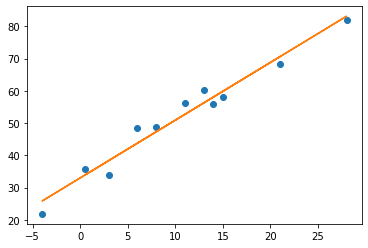

In [11]:
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, (x * w_b[0] + w_b[1]).detach().numpy(), '-')

## Recipe 3-5. Further Optimizing the Function Problem
How do we optimize the training set and test it with a validation set using random samples?

In [12]:
n_training = x.shape[0]
n_testing = int(0.2 * n_training)

shuffled_indices = torch.randperm(n_training)
training_indices = shuffled_indices[:-n_testing]
testing_indices = shuffled_indices[-n_testing:]

print("training_indices:", training_indices)
print("testing_indices:", testing_indices)

training_indices: tensor([ 9, 10,  8,  7,  4,  5,  1,  0,  3])
testing_indices: tensor([6, 2])


In [13]:
x_training_set = x[training_indices]
y_training_set = y[training_indices]
x_testing_set = x[testing_indices]
y_testing_set = y[testing_indices]

w_b = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([w_b], lr=0.1)
# can-not-be-more-near torch version
# training
for epoch in range(epoches):
    loss = functional.mse_loss(w_b[0] * x_training_set + w_b[1], y_training_set)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w =', w_b[0])
print('b =', w_b[1])
print('x_training_set * w + b =', x_training_set * w_b[0] + w_b[1])
print('training_loss =', functional.mse_loss(x_training_set * w_b[0] + w_b[1], y_training_set))
print('testing_loss =', functional.mse_loss(x_testing_set * w_b[0] + w_b[1], y_testing_set))

w = tensor(1.7561, grad_fn=<SelectBackward>)
b = tensor(34.0546, grad_fn=<SelectBackward>)
x_training_set * w + b = tensor([56.8835, 70.9321, 44.5910, 27.0303, 53.3714, 48.1032, 58.6396, 34.9327,
        83.2246], grad_fn=<AddBackward0>)
training_loss = tensor(8.8558, grad_fn=<MseLossBackward>)
testing_loss = tensor(17.1140, grad_fn=<MseLossBackward>)
